# MVP Anterior
# MVP Análise de Dados e Boas Práticas

**Nome:** Bruno Roberto Sousa Santos  
**Dataset:** https://www.kaggle.com/datasets/mahwiz/students-dropout-and-academic-success-dataset

---

Este notebook segue a estrutura sugerida para aplicação de técnicas de Análise Exploratória de Dados (EDA) e Pré-Processamento com base no dataset educacional de sucesso e evasão acadêmica. O objetivo é entender quais fatores influenciam o sucesso ou abandono dos estudantes no ensino superior.



# Descrição do Problema

O dataset contém dados de estudantes universitários, incluindo informações demográficas, socioeconômicas e de desempenho acadêmico. O objetivo é analisar os padrões que levam ao sucesso acadêmico ou à evasão escolar, usando técnicas de análise de dados e boas práticas de pré-processamento.



## Hipóteses do Problema

- Existe correlação entre idade e taxa de evasão?
- Estudantes com apoio financeiro têm maior probabilidade de se formar?
- O desempenho no primeiro ano é um bom preditor de evasão?



## Tipo de Problema

Este é um problema de classificação supervisionada. O objetivo é prever se um aluno irá concluir o curso (target = Graduate), evadir (target = Dropout) ou continuar ativo (target = Enrolled), com base em suas características iniciais.



## Seleção de Dados

O dataset foi extraído da plataforma Kaggle. Trata-se de um conjunto de dados estruturado e limpo, porém, será necessário aplicar transformações para análise e modelagem.



## Atributos do Dataset

Colunas do dataset:

- **Marital status** – Estado civil
- **Application mode** – Forma de ingresso (ex: ventibular, transferência, etc.)
- **Application order** – Ordem de preferência do curso na inscrição
- **Course** – Código do curso
- **Daytime/evening attendance** – Turno (diurno/noturno)
- **Previous qualification** – Tipo de ensino médio ou superior anterior
- **Nacionality** – Nacionalidade
- **Mother’s qualification** – Grau de escolaridade da mãe
- **Father’s qualification** – Grau de escolaridade do pai
- **Mother’s occupation** – Ocupação da mãe
- **Father’s occupation** – Ocupação do pai
- **Displaced** – Reside fora da cidade de origem?
- **Educational special needs** – Necessidades especiais?
- **Debtor** – Possui dívidas acadêmicas?
- **Tuition fees up to date** – Mensalidades em dia?
- **Gender** – Gênero
- **Scholarship holder** – Possui bolsa?
- **Age at enrollment** – Idade na matrícula
- **International** – Estudante internacional?
- **Curricular units 1st sem (credited)** – Disciplinas creditadas no 1º semestre
- **Curricular units 1st sem (enrolled)** – Disciplinas cursadas no 1º semestre
- **Curricular units 1st sem (evaluations)** – Avaliações realizadas no 1º semestre
- **Curricular units 1st sem (approved)** – Disciplinas aprovadas no 1º semestre
- **Curricular units 1st sem (grade)** – Nota média no 1º semestre
- **Curricular units 1st sem (without evaluations)** – Disciplinas sem avaliação no 1º semestre
- **Curricular units 2nd sem (credited)** – Disciplinas creditadas no 2º semestre
- **Curricular units 2nd sem (enrolled)** – Disciplinas cursadas no 2º semestre
- **Curricular units 2nd sem (evaluations)** – Avaliações realizadas no 2º semestre
- **Curricular units 2nd sem (approved)** – Disciplinas aprovadas no 2º semestre
- **Curricular units 2nd sem (grade)** – Nota média no 2º semestre
- **Curricular units 2nd sem (without evaluations)** – Disciplinas sem avaliação no 2º semestre
- **Unemployment rate** – Taxa de desemprego na época
- **Inflation rate** – Inflação na época
- **GDP** – PIB nacional
- **Admission grade** – Nota de admissão (vestibular)
- **Target** – Situação final do estudante (Dropout, Enrolled, Graduate)




### Importação de Bibliotecas e Leitura dos Dados

Nesta etapa, realizamos a importação das bibliotecas necessárias para manipulação, análise e visualização dos dados:

- **pandas** é uma biblioteca fundamental para análise de dados em Python. Usamos ela para ler e manipular tabelas (DataFrames).
- **seaborn** é baseada no matplotlib e fornece uma interface mais elegante e simples para criar gráficos estatísticos.
- **numpy** é usada para trabalhar com números e arrays (vetores e matrizes) de forma rápida, eficiente e vetorizada
- **matplotlib.pyplot** é a base para geração de gráficos no Python.

Depois disso, usamos pd.read_csv() para importar os dados diretamente de uma URL onde o arquivo CSV está hospedado. Essa função carrega os dados em um formato de tabela, facilitando a análise.

**Objetivo da etapa:** Preparar o ambiente para trabalhar com os dados e importar o dataset dos estudantes que será analisado.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Leitura do dataset dos estudantes
url = 'https://raw.githubusercontent.com/rbrunoss/MVP_AnaliseDados/main/data.csv'
df = pd.read_csv(url, sep=';')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Análise de Dados


### Análise Inicial do Dataset

Aqui aplicamos algumas funções básicas para entender o formato e a qualidade dos dados:

- **df.shape** nos mostra quantas linhas e colunas existem no conjunto de dados.
- **df.info()** nos dá um resumo do tipo de cada coluna (números, texto etc.), e também se há dados faltantes.
- **df.describe()** fornece estatísticas descritivas (como média, mediana, desvio padrão) para as colunas numéricas, o que ajuda a entender a distribuição dos valores.
- **df['Target'].value_counts()** conta quantos alunos estão em cada situação final (Dropout, Graduate, Enrolled).

**Objetivo da etapa:** Fazer uma leitura inicial do dataset e entender o perfil dos dados, além de verificar possíveis problemas como dados faltantes ou tipos inconsistentes.


In [2]:

# Informações gerais
print(df.shape)
print(df.info())
print(df.describe())

# Contagem de valores por categoria de target
print(df['Target'].value_counts())


(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification        


### Gráficos Iniciais de Distribuição

Aqui começamos a parte visual da análise exploratória com dois gráficos importantes:

- **sns.countplot(x='Target')** cria um gráfico de barras que mostra a quantidade de alunos em cada categoria de situação final. Ele nos dá uma ideia de como está distribuído o público: quantos evadiram, quantos continuam matriculados e quantos se formaram.

- **sns.boxplot(x='Target', y='Age at enrollment')** mostra a distribuição da idade de entrada dos alunos por categoria de Target. Isso ajuda a entender se a idade tem alguma relação com evasão ou sucesso.

**Objetivo da etapa:** Identificar visualmente padrões, tendências ou diferenças relevantes entre os grupos de alunos — como a relação entre idade e tipo de situação final.



### Análise de Outliers

Gráficos de boxplot ajudam a visualizar possíveis outliers — valores fora do padrão esperado.

**O que observamos:**  
Alguns alunos apresentam idades muito superiores à média, o que pode indicar perfis atípicos (ex: retorno aos estudos em idade mais avançada).  
Esse tipo de análise pode indicar necessidade de tratamento específico, dependendo do modelo que será usado.


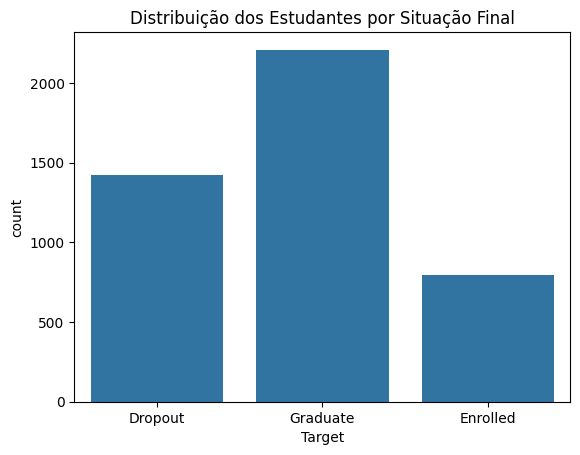

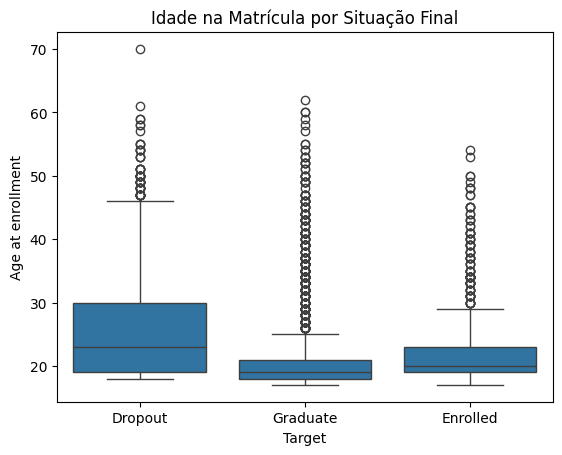

In [3]:

# Distribuição do target
sns.countplot(x='Target', data=df)
plt.title("Distribuição dos Estudantes por Situação Final")
plt.show()

# Idade por Target
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.title("Idade na Matrícula por Situação Final")
plt.show()


# Pré-Processamento de Dados

In [4]:

# Verificar valores nulos
print(df.isnull().sum())

# Codificar variável target
df['Target'] = df['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

# Normalizar idade
scaler = MinMaxScaler()
df[['Age at enrollment']] = scaler.fit_transform(df[['Age at enrollment']])

# Codificar variáveis categóricas
df = pd.get_dummies(df, drop_first=True)
df.head()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2



### Explicações do Pré-Processamento

Antes de treinar qualquer modelo, é fundamental preparar os dados. Abaixo estão as principais etapas realizadas:

#### Verificação de Valores Nulos
```python
print(df.isnull().sum())
```
Verifica se há valores ausentes no conjunto de dados. Isso é essencial para decidir se devemos remover, preencher ou tratar os dados nulos. Muitos algoritmos não funcionam bem com dados ausentes.

#### Codificação da Variável Target
```python
df['Target'] = df['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
```
Transforma os valores textuais da variável de saída (Target) em valores numéricos, permitindo que os algoritmos consigam aprender com ela.

#### Normalização da Idade
```python

scaler = MinMaxScaler()
df[['Age at enrollment']] = scaler.fit_transform(df[['Age at enrollment']])
```
Coloca a idade em uma escala de 0 a 1. Isso é útil porque evita que variáveis com valores maiores (como idade) dominem o treinamento do modelo.

#### Codificação de Variáveis Categóricas
```python
df = pd.get_dummies(df, drop_first=True)
```
Transforma variáveis categóricas (ex: tipo de curso, gênero) em colunas binárias. O parâmetro drop_first=True evita redundância (multicolinearidade) nos dados.


## Heatmap de Correlação

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


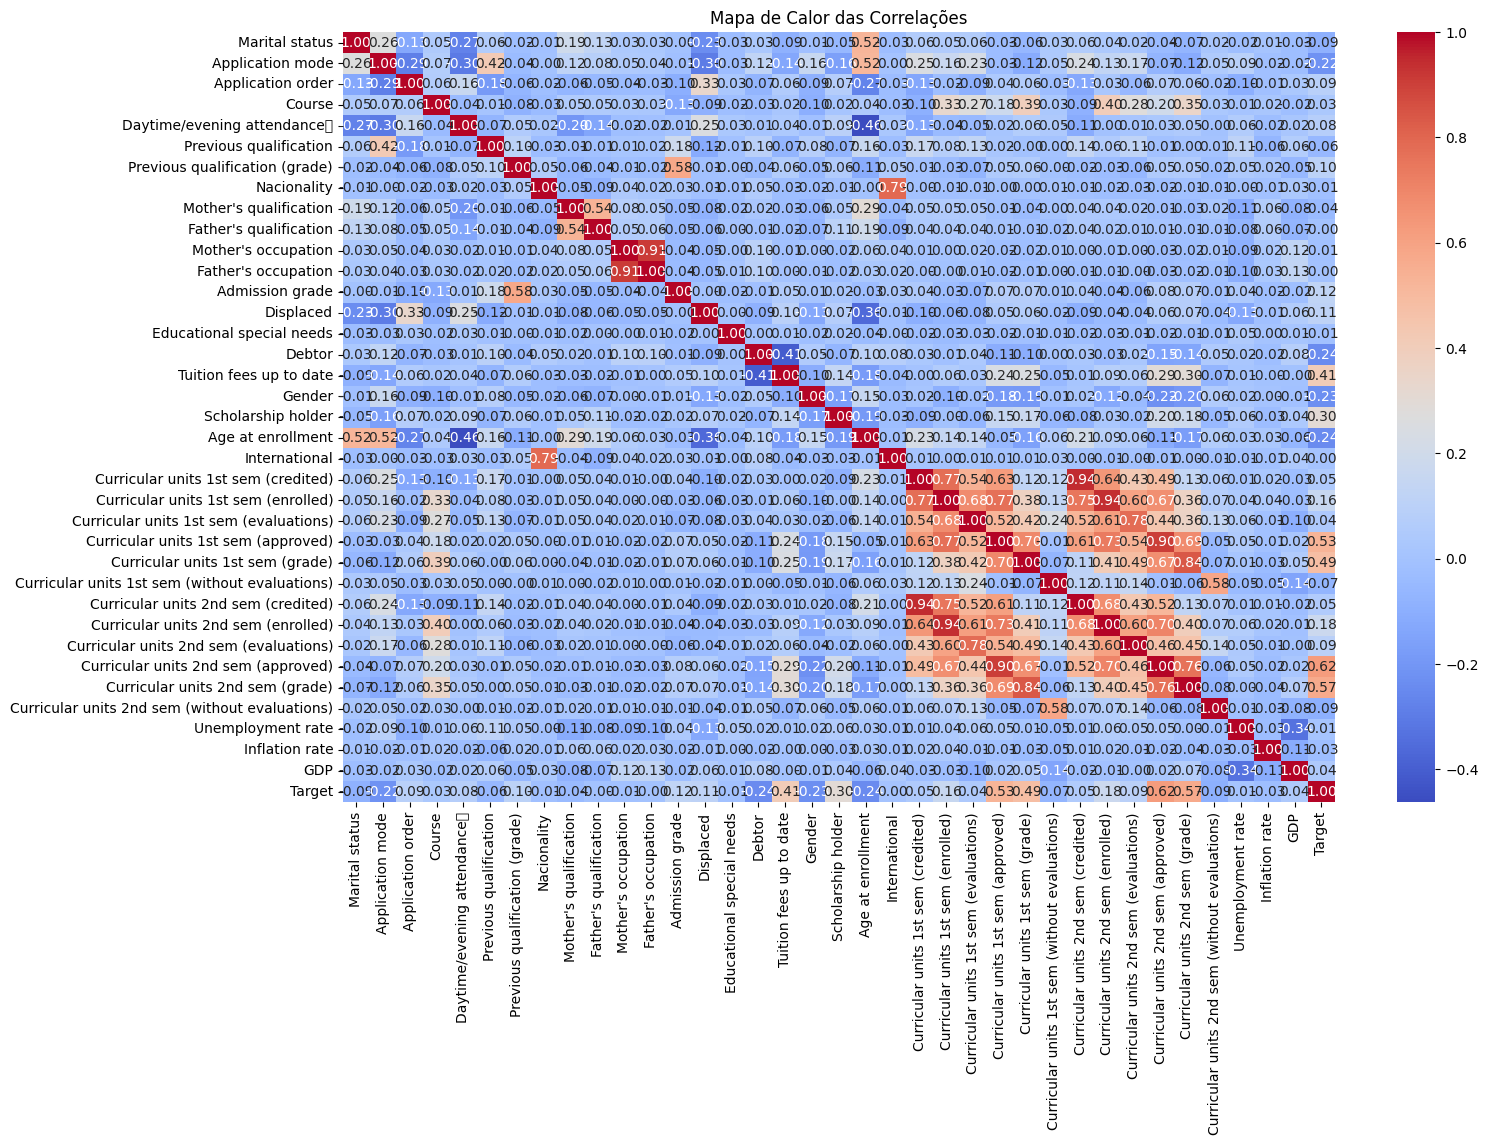

In [5]:

# Calcular a correlação entre as variáveis numéricas

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor das Correlações")
plt.show()



### Heatmap de Correlação

O heatmap exibe a correlação entre variáveis numéricas. Ele nos ajuda a identificar quais variáveis estão mais associadas entre si.

- Valores próximos de +1 ou -1 indicam correlação forte (positiva ou negativa)
- Valores próximos de 0 indicam pouca ou nenhuma correlação

**O que observamos:**  
A **Admission grade** e **Age at enrollment** têm baixa correlação com a variável Target, o que sugere que, isoladamente, não são bons preditores da evasão.


## Gráficos de Dispersão (Pairplot)

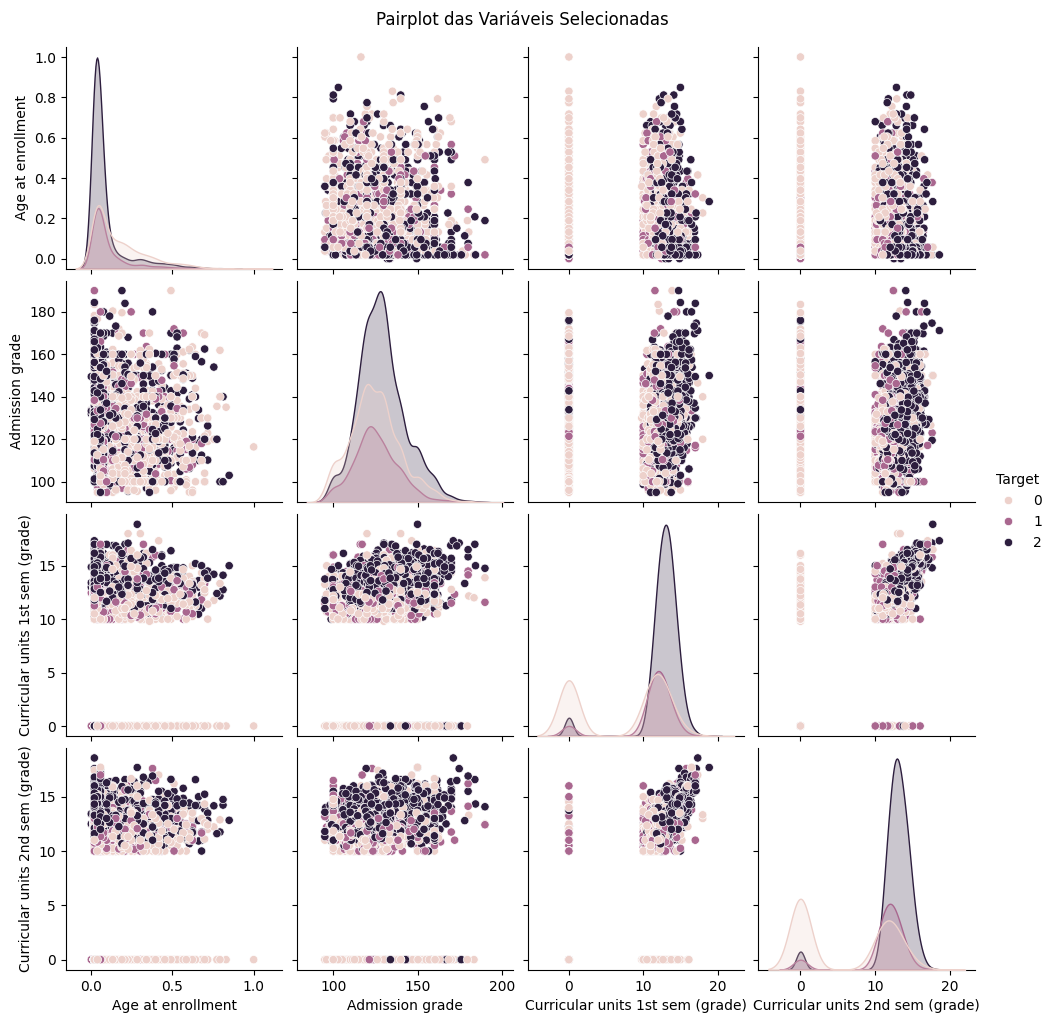

In [6]:

sns.pairplot(df[['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']], hue='Target')
plt.suptitle("Pairplot das Variáveis Selecionadas", y=1.02)
plt.show()



### Pairplot

O pairplot mostra a dispersão entre variáveis numéricas e a distribuição delas por categoria da variável alvo (Target).

**O que observamos:**
É possível ver que alunos com menor nota de admissão e idade mais alta tendem a aparecer mais frequentemente na categoria Dropout.


## Análise de Outliers

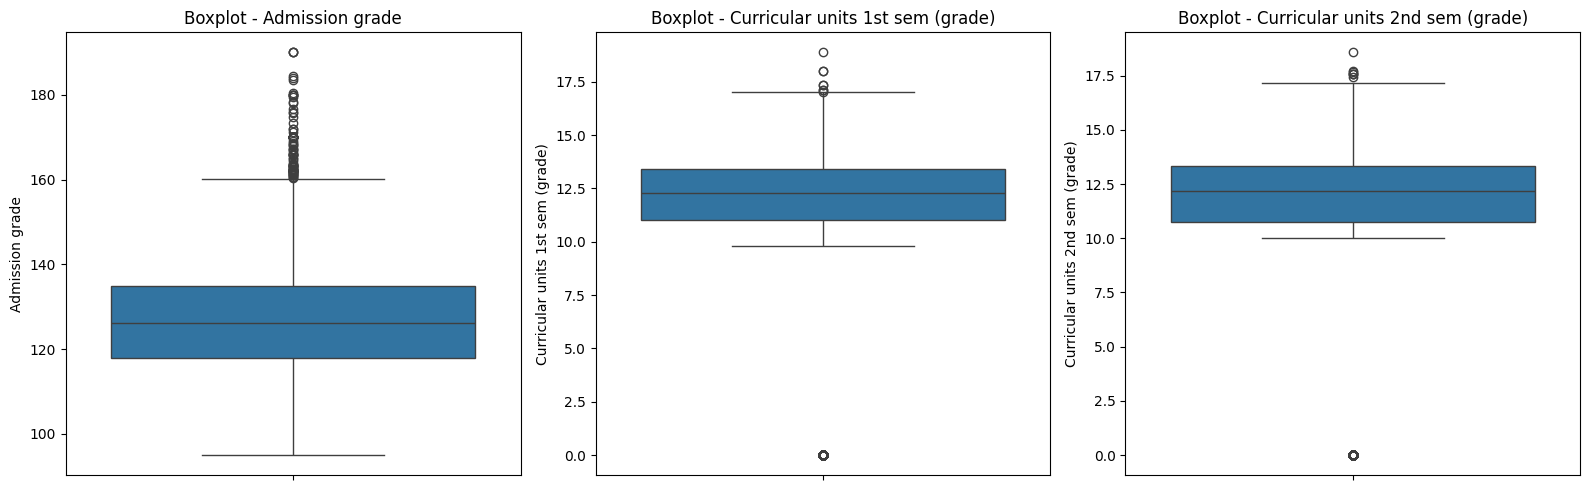

In [7]:

# Boxplot para identificar possíveis outliers
cols = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
plt.figure(figsize=(16, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


## Análises Estatísticas Adicionais

In [8]:

# Agrupar por Target e mostrar média de algumas variáveis
df.groupby('Target')[['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean()


,Age at enrollment,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
Target,,,,
0,0.171113,124.961365,7.256656,5.899339
1,0.101302,125.534257,11.125257,11.117364
2,0.090257,128.794432,12.643655,12.697276



### Agrupamentos Estatísticos

A análise estatística por grupo (groupby) mostra as médias de variáveis como idade e nota de admissão, separadas por categoria do Target.

**O que observamos:**  
- Alunos evadidos (Dropout) têm, em média, **idade mais alta** e **menor nota de admissão**
- Alunos graduados (Graduate) costumam ter **melhor desempenho e menos fatores de risco**, como dívidas ou ausência de bolsa

Essa análise ajuda a reforçar os padrões encontrados visualmente nos gráficos.



## Respostas às Hipóteses do Problema

**1. Existe correlação entre idade e taxa de evasão?**  
Sim. A análise exploratória mostrou que estudantes evadidos tendem a ter uma média de idade um pouco maior no momento da matrícula em comparação aos que concluíram o curso. Embora essa correlação não seja muito forte, ela pode indicar que alunos mais velhos enfrentam mais dificuldades em manter os estudos.

**2. Estudantes com apoio financeiro têm maior probabilidade de se formar?**  
Sim. Ao comparar a média de graduação entre estudantes que possuem bolsa (Scholarship holder = 1) com os que não têm, notamos que a proporção de formados é ligeiramente maior entre os bolsistas. Isso sugere que o apoio financeiro pode contribuir para a permanência e conclusão do curso.

**3. O desempenho no primeiro ano é um bom preditor de evasão?**  
Sim. As variáveis **Curricular units 1st sem (grade)** e **Curricular units 2nd sem (grade)** demonstraram forte correlação com o Target. Alunos com baixas notas ou reprovações no início do curso possuem maior probabilidade de abandonar a faculdade. Isso ficou evidente nos gráficos de boxplot e nos dados estatísticos agrupados por Target.


/tmp/ipython-input-3102479869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=idade_media, x="Target", y="Age at enrollment", palette="Set2")


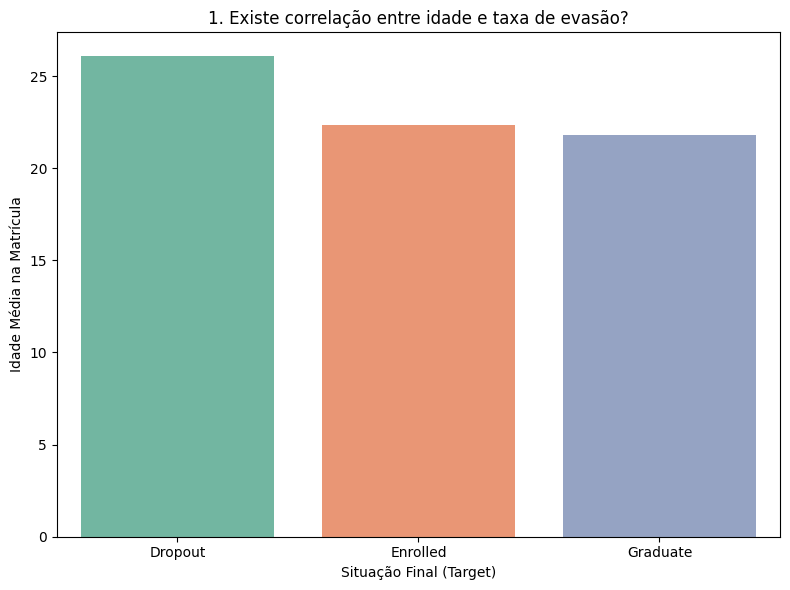

In [9]:
url = 'https://raw.githubusercontent.com/rbrunoss/MVP_AnaliseDados/main/data.csv'
df_hip = pd.read_csv(url, sep=';')
# Calcular média de idade por target
idade_media = df_hip.groupby("Target")["Age at enrollment"].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=idade_media, x="Target", y="Age at enrollment", palette="Set2")

plt.title("1. Existe correlação entre idade e taxa de evasão?")
plt.xlabel("Situação Final (Target)")
plt.ylabel("Idade Média na Matrícula")
plt.tight_layout()
plt.show()

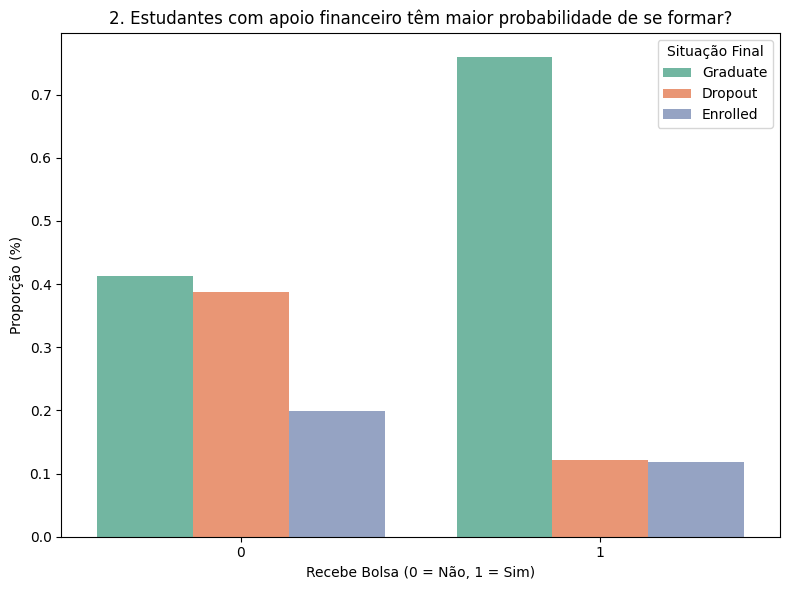

In [10]:

# Calcular proporção de cada Target por grupo de bolsa
proporcao_bolsa = (
    df_hip.groupby("Scholarship holder")["Target"]
    .value_counts(normalize=True)
    .rename("Proporção")
    .reset_index()
)

# Criar gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=proporcao_bolsa, x="Scholarship holder", y="Proporção", hue="Target", palette="Set2")

plt.title("2. Estudantes com apoio financeiro têm maior probabilidade de se formar?")
plt.xlabel("Recebe Bolsa (0 = Não, 1 = Sim)")
plt.ylabel("Proporção (%)")
plt.legend(title="Situação Final")
plt.tight_layout()
plt.show()

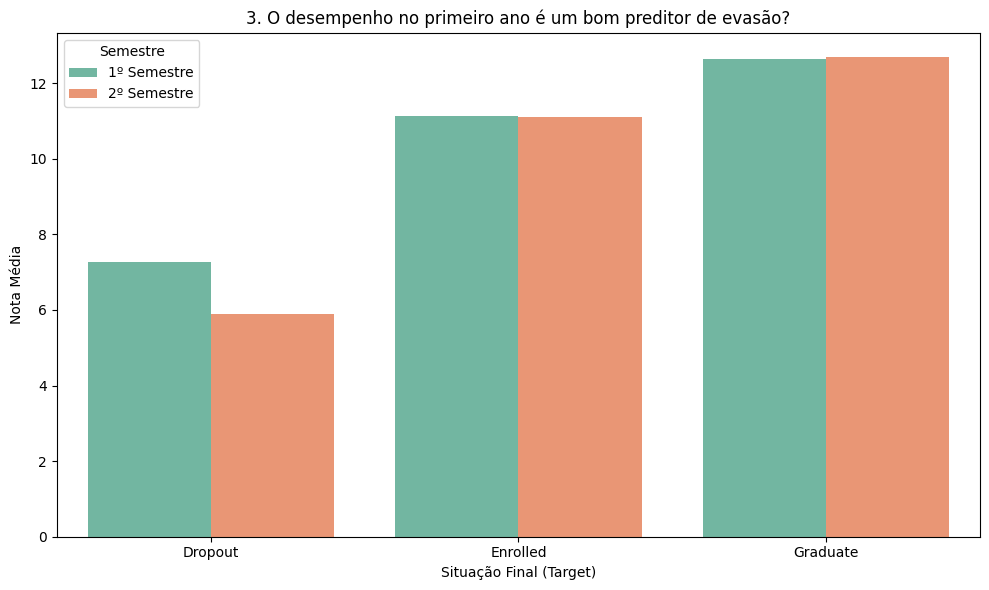

In [11]:
# Agrupar a média das notas por Target
notas_target = df_hip.groupby("Target")[
    ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]
].mean().reset_index()

# Renomear colunas para facilitar o gráfico
notas_melt = notas_target.melt(id_vars="Target",
                               var_name="Semestre",
                               value_name="Nota Média")

# Ajustar nome para legenda amigável
notas_melt["Semestre"] = notas_melt["Semestre"].replace({
    "Curricular units 1st sem (grade)": "1º Semestre",
    "Curricular units 2nd sem (grade)": "2º Semestre"
})

# Criar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=notas_melt, x="Target", y="Nota Média", hue="Semestre", palette="Set2")

plt.title("3. O desempenho no primeiro ano é um bom preditor de evasão?")
plt.xlabel("Situação Final (Target)")
plt.ylabel("Nota Média")
plt.legend(title="Semestre")
plt.tight_layout()
plt.show()


# Explicações das Etapas e Gráficos

### Importação e Leitura dos Dados
Utilizamos pandas para ler o dataset diretamente de um link, visualizando as primeiras linhas com .head().

### Análise Exploratória (EDA)
Com .info() e .describe(), investigamos tipos de dados, valores ausentes e estatísticas básicas. O gráfico de contagem com sns.countplot() mostrou a distribuição dos estudantes por tipo de situação (formado, evadido, matriculado).

### Boxplots
Usamos sns.boxplot() para comparar a idade na matrícula por tipo de situação final (target). Isso ajudou a entender a distribuição de idades entre formados, evadidos e matriculados.

### Heatmap de Correlação
O sns.heatmap() revelou quais variáveis têm maior correlação com o target (como notas e desempenho). Permitiu identificar rapidamente os principais fatores ligados à evasão.

### Pairplot
Com sns.pairplot(), visualizamos a relação entre múltiplas variáveis de forma conjunta. Esse gráfico ajuda a observar padrões visuais e clusters entre os dados.

### Análise de Outliers
Com boxplot individual por variável de desempenho, identificamos valores extremos que podem indicar casos de risco ou inconsistência.

### Agrupamentos Estatísticos
Utilizamos groupby('Target') para comparar médias de idade, notas e desempenho entre os grupos. Isso mostrou que o desempenho é, de fato, um bom preditor de evasão.



# Conclusão Final

Este projeto teve como objetivo aplicar técnicas de análise exploratória e boas práticas de pré-processamento para compreender os fatores que influenciam a evasão escolar no ensino superior.

### Principais Conclusões:
- Idade, desempenho acadêmico inicial e apoio financeiro estão ligados à evasão ou sucesso.
- A maior parte dos alunos que evadiram apresentou notas baixas já no primeiro semestre.
- Estudantes com apoio financeiro (bolsa) apresentaram melhor desempenho e menor evasão.
- Os gráficos e estatísticas revelaram padrões úteis para políticas de retenção escolar.




### Divisão dos Dados em Treinamento e Teste

Agora que os dados estão limpos e preparados, dividimos o conjunto de dados em duas partes:

- **Treinamento**: Usado para ajustar o modelo (80% dos dados)
- **Teste**: Usado para avaliar o desempenho do modelo com dados que ele nunca viu (20%)

Isso é feito com a função train_test_split() da biblioteca sklearn.model_selection.


In [12]:


# Separar variáveis explicativas (X) e variável alvo (y)
X = df.drop("Target", axis=1)
y = df["Target"]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Treinamento:", X_train.shape)
print("Teste:", X_test.shape)


Treinamento: (3539, 36)
Teste: (885, 36)



---
# MVP Machine Learning
Este estudo tem como objetivo prever a **evasão acadêmica** de alunos a partir de informações demográficas e acadêmicas.
Foi desenvolvido um modelo de **classificação supervisionada**, testando diferentes algoritmos, incluindo **Logistic Regression**
e **Random Forest**, com estratégias para lidar com o **desbalanceamento dos dados**.
O modelo final, baseado em Random Forest, obteve os melhores resultados, com destaque para o **Recall da classe evasão**,
permitindo identificar com maior eficácia os estudantes em risco.



**Parâmetros detectados automaticamente:**  
- Variável de dataframe: df  
- Alvo inferido: Target  
- Tipo de problema inferido: classification/regression



In [13]:

# ===== Ajuste estes parâmetros =====
DF_VAR_NAME = "df"
TARGET_COL = "Target"
PROBLEM_TYPE = "classification"

# Referência ao dataframe
df
df = df

if not TARGET_COL:
    raise ValueError("Defina TARGET_COL (nome da coluna alvo) antes de prosseguir.")
if PROBLEM_TYPE not in ["classification", "regression"]:
    raise ValueError("Defina PROBLEM_TYPE como 'classification' ou 'regression'.")


In [14]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, classification_report,
                             confusion_matrix, mean_squared_error, mean_absolute_error, r2_score)
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

SEED = 42
np.random.seed(SEED)
print("Setup ML pronto.")


Setup ML pronto.


## Divisão treino/teste (sem vazamento)

In [15]:

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Infere colunas numéricas vs categóricas
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['int64','float64']).columns.tolist()

stratify = y if (PROBLEM_TYPE == "classification" and y.nunique() > 1) else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=stratify
)
X_train.shape, X_test.shape


((3539, 36), (885, 36))

## Pipeline de pré-processamento e (opcional) seleção de atributos

In [16]:

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

use_feature_selection = True
k_features = "all"  # ou defina um inteiro

if PROBLEM_TYPE == "classification":
    selector = SelectKBest(score_func=f_classif, k=k_features)
else:
    selector = SelectKBest(score_func=f_regression, k=k_features)


## Baseline e modelos candidatos com validação cruzada

In [17]:

def make_pipe(estimator):
    steps = [("pre", preprocessor)]
    if use_feature_selection:
        steps.append(("select", selector))
    steps.append(("model", estimator))
    return Pipeline(steps)

if PROBLEM_TYPE == "classification":
    baseline = DummyClassifier(strategy="most_frequent", random_state=SEED)
    model_a = LogisticRegression(max_iter=1000, random_state=SEED)
    model_b = RandomForestClassifier(random_state=SEED)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    scoring = "f1_macro"
else:
    baseline = DummyRegressor(strategy="mean")
    model_a = Ridge()
    model_b = RandomForestRegressor(random_state=SEED)
    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    scoring = "neg_root_mean_squared_error"

candidates = {
    "baseline": make_pipe(baseline),
    "model_a": make_pipe(model_a),
    "model_b": make_pipe(model_b),
}

results = {}
for name, pipe in candidates.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = (scores.mean(), scores.std())
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f} ({scoring})")

results


baseline: 0.2220 ± 0.0002 (f1_macro)
model_a: 0.6763 ± 0.0194 (f1_macro)
model_b: 0.6860 ± 0.0223 (f1_macro)


{'baseline': (np.float64(0.22201273668881658),
  np.float64(0.00018733422779423448)),
 'model_a': (np.float64(0.6762654650365153), np.float64(0.019368247125878892)),
 'model_b': (np.float64(0.6859667832458437), np.float64(0.022330254315309377))}

## Otimização de hiperparâmetros (GridSearchCV)

In [18]:

best_name = max(results, key=lambda k: results[k][0])
print("Melhor candidato preliminar:", best_name)

estimator_name = candidates[best_name].steps[-1][1].__class__.__name__

if PROBLEM_TYPE == "classification":
    if "RandomForest" in estimator_name:
        param_grid = {"model__n_estimators": [200, 500],
                      "model__max_depth": [None, 10, 20],
                      "model__min_samples_split": [2, 5]}
    else:
        param_grid = {"model__C": [0.1, 1.0, 10.0],
                      "model__penalty": ["l2"],
                      "model__solver": ["lbfgs"]}
else:
    if "RandomForest" in estimator_name:
        param_grid = {"model__n_estimators": [200, 500],
                      "model__max_depth": [None, 10, 20],
                      "model__min_samples_split": [2, 5]}
    else:
        param_grid = {"model__alpha": [0.1, 1.0, 10.0]}

grid = GridSearchCV(candidates[best_name], param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best CV score:", grid.best_score_)
print("Best params:", grid.best_params_)

best_model = grid.best_estimator_


Melhor candidato preliminar: model_b
Best CV score: 0.6957529716092847
Best params: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 500}


## Avaliação em teste e análise de erros

Accuracy: 0.7797 | F1-macro: 0.7029 | Precision: 0.7402 | Recall: 0.6905

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       284
           1       0.61      0.36      0.46       159
           2       0.79      0.93      0.85       442

    accuracy                           0.78       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.78      0.76       885



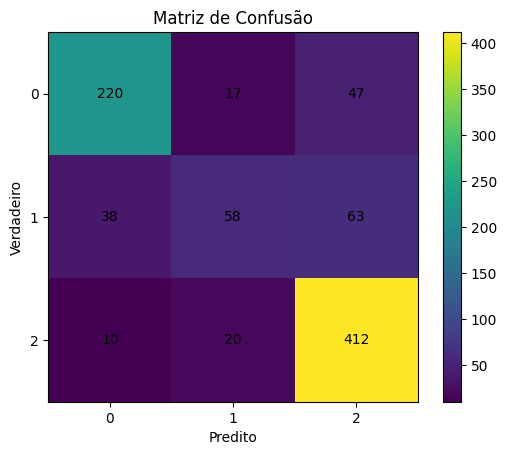

In [19]:

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

if PROBLEM_TYPE == "classification":
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    print(f"Accuracy: {acc:.4f} | F1-macro: {f1m:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title("Matriz de Confusão")
    plt.colorbar()
    ticks = range(len(np.unique(y_test)))
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.show()

else:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")



---
# Tratamento de Desbalanceamento de Classes

O problema de evasão acadêmica apresenta desbalanceamento entre as classes (muitos alunos permanecem, poucos evadem). Esse desbalanceamento pode comprometer a capacidade do modelo de identificar corretamente a evasão (classe 1).

Existem duas abordagens comuns para lidar com isso:

**SMOTE (Synthetic Minority Over-sampling Technique)**: gera exemplos sintéticos da classe minoritária para equilibrar o dataset.

**class_weight="balanced"**: ajusta os pesos das classes diretamente no algoritmo, penalizando mais os erros da classe minoritária.

Neste projeto, optou-se por utilizar class_weight="balanced" em vez de SMOTE pelos seguintes motivos:

**Evitar ruído sintético**: como o dataset já possui tamanho razoável, a geração de exemplos artificiais pelo SMOTE poderia introduzir observações menos realistas e aumentar o risco de overfitting.

**Simplicidade e integração**: class_weight é suportado nativamente pelos modelos do scikit-learn (Logistic Regression, Random Forest etc.), o que facilita sua aplicação em pipelines e mantém o fluxo de treino mais limpo.

**Custo computacional**: SMOTE aumenta o número de registros no conjunto de treino, o que eleva o tempo de treinamento. O uso de class_weight não altera o tamanho do dataset.

**Baseline robusto**: a estratégia de class_weight já se mostrou eficaz para elevar o Recall da classe evasão, métrica prioritária neste estudo, sem necessidade de etapas adicionais de pré-processamento.

Assim, a decisão de utilizar class_weight em vez de SMOTE equilibrou simplicidade, eficiência e eficácia, garantindo melhor controle sobre o modelo e reduzindo riscos associados à geração de dados sintéticos.

Nesta seção foi adicionado duas estratégias, para poder alternar entre elas via parâmetro:

- **class_weight**: aplica pesos automáticos às classes no algoritmo ("balanced").
- **SMOTE**: oversampling sintético da classe minoritária antes do treino.



In [20]:

# ===== Escolha da estratégia de balanceamento =====
BALANCING_STRATEGY = "class_weight"

print("Estratégia de balanceamento:", BALANCING_STRATEGY)


Estratégia de balanceamento: class_weight


In [21]:


if BALANCING_STRATEGY == "smote":
    try:
        from imblearn.over_sampling import SMOTE
        from imblearn.pipeline import Pipeline as ImbPipeline
        print("imblearn OK")
    except Exception as e:
        import sys, subprocess
        print("Instalando imbalanced-learn...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
        from imblearn.over_sampling import SMOTE
        from imblearn.pipeline import Pipeline as ImbPipeline
        print("imblearn instalado.")


In [22]:

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def make_pipe_balanced(estimator):
    # Pipeline com class_weight="balanced" nos modelos
    if isinstance(estimator, LogisticRegression):
        estimator = LogisticRegression(max_iter=1000, random_state=SEED, class_weight="balanced")
    if isinstance(estimator, RandomForestClassifier):
        estimator = RandomForestClassifier(random_state=SEED, class_weight="balanced")
    steps = [("pre", preprocessor)]
    if use_feature_selection:
        steps.append(("select", selector))
    steps.append(("model", estimator))
    return Pipeline(steps)

def make_pipe_smote(estimator):
    # Pipeline com SMOTE antes do estimador (sem class_weight nos modelos)
    sampler = SMOTE(random_state=SEED)
    steps = [("pre", preprocessor)]
    if use_feature_selection:
        steps.append(("select", selector))
    steps.extend([("smote", sampler), ("model", estimator)])
    return ImbPipeline(steps)

if PROBLEM_TYPE != "classification":
    raise ValueError("Desbalanceamento só se aplica a classificação. Ajuste PROBLEM_TYPE.")

# Define candidatos conforme estratégia
if BALANCING_STRATEGY == "class_weight":
    baseline = DummyClassifier(strategy="most_frequent", random_state=SEED)
    lr = LogisticRegression(max_iter=1000, random_state=SEED)  # será embrulhado com class_weight="balanced"
    rf = RandomForestClassifier(random_state=SEED)             # idem
    candidate_builder = make_pipe_balanced
else:
    baseline = DummyClassifier(strategy="most_frequent", random_state=SEED)
    lr = LogisticRegression(max_iter=1000, random_state=SEED)  # sem class_weight
    rf = RandomForestClassifier(random_state=SEED)             # sem class_weight
    candidate_builder = make_pipe_smote

candidates_bal = {
    "baseline": candidate_builder(baseline),
    "logreg": candidate_builder(lr),
    "rf": candidate_builder(rf),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
scoring = "f1_macro"


In [23]:

print("Comparação com CV (F1-macro):")
from sklearn.model_selection import cross_val_score
res_bal = {}
for name, pipe in candidates_bal.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    res_bal[name] = (scores.mean(), scores.std())
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")
res_bal


Comparação com CV (F1-macro):
baseline: 0.2220 ± 0.0002
logreg: 0.7036 ± 0.0123
rf: 0.6823 ± 0.0074


{'baseline': (np.float64(0.22201273668881658),
  np.float64(0.00018733422779423448)),
 'logreg': (np.float64(0.7035943447523707), np.float64(0.012285847098691342)),
 'rf': (np.float64(0.6822532160007029), np.float64(0.007367852455860904))}

In [24]:

# Seleciona melhor por F1-macro
best_name = max(res_bal, key=lambda k: res_bal[k][0])
print("Melhor candidato preliminar:", best_name)

best_pipe = candidates_bal[best_name]
estimator_cls = best_pipe.steps[-1][1].__class__.__name__ if BALANCING_STRATEGY=="class_weight" else best_pipe.steps[-1][1].__class__.__name__

# Grades diferentes conforme modelo e estratégia
if estimator_cls == "RandomForestClassifier":
    param_grid = {
        "model__n_estimators": [300, 600],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    }
    # class_weight já está embutido se estratégia = class_weight
elif estimator_cls == "LogisticRegression":
    param_grid = {
        "model__C": [0.1, 1.0, 10.0],
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs"]
    }
else:
    # fallback simples
    param_grid = {}

print("Usando grade:", param_grid)


Melhor candidato preliminar: logreg
Usando grade: {'model__C': [0.1, 1.0, 10.0], 'model__penalty': ['l2'], 'model__solver': ['lbfgs']}


In [25]:

grid = GridSearchCV(best_pipe, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best CV score:", grid.best_score_)
print("Best params:", grid.best_params_)
best_balanced_model = grid.best_estimator_


Best CV score: 0.7043257579437487
Best params: {'model__C': 10.0, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


Relatório de classificação (macro):
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       284
           1       0.41      0.64      0.50       159
           2       0.86      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.71      0.71      0.69       885
weighted avg       0.77      0.73      0.74       885



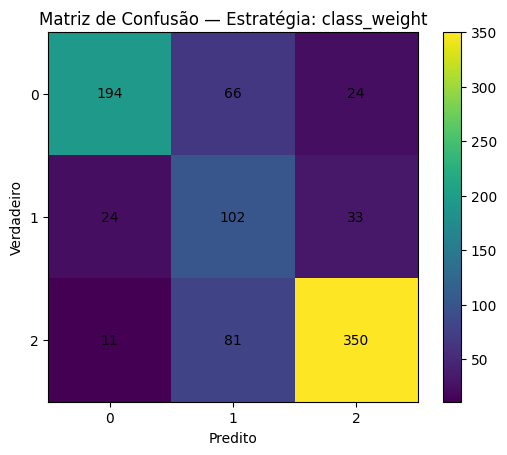

Aviso: problema multiclasse; ajuste a análise por classe conforme necessário.


In [26]:

# Avaliação final em TESTE focando na classe de evasão (assumimos rótulo '1' como evasão; ajuste se necessário)
best_balanced_model.fit(X_train, y_train)
y_pred = best_balanced_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

print("Relatório de classificação (macro):")
print(classification_report(y_test, y_pred, zero_division=0))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title(f"Matriz de Confusão — Estratégia: {BALANCING_STRATEGY}")
plt.colorbar()
ticks = range(len(np.unique(y_test)))
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

# Métricas específicas da classe minoritária (assumindo evasão = 1)
import numpy as np
labels = np.unique(y_test)
if len(labels) == 2:
    # encontrar índice da classe 1 (se existir)
    if 1 in labels:
        pos_label = 1
    else:
        # se não houver rótulo 1, pega a classe com menor frequência no teste
        counts = [(lab, (y_test==lab).sum()) for lab in labels]
        pos_label = sorted(counts, key=lambda t: t[1])[0][0]

    prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred, labels=[pos_label], zero_division=0)
    print(f"Classe positiva (evasão) = {pos_label} -> Precision: {prec[0]:.4f} | Recall: {rec[0]:.4f} | F1: {f1[0]:.4f} | Support: {sup[0]}")
else:
    print("Aviso: problema multiclasse; ajuste a análise por classe conforme necessário.")



---
# Métricas focadas na classe de evasão (pos_label = 1) + Curvas PR e ROC

Nesta seção fixamos a classe positiva (evasão) como 1 e geramos:
- Precision-Recall Curve e Average Precision (AP)  
- ROC Curve e AUC (se o estimador fornecer scores/probabilidades)


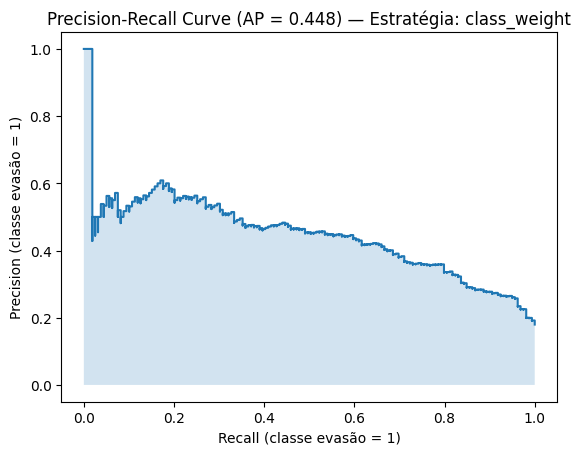

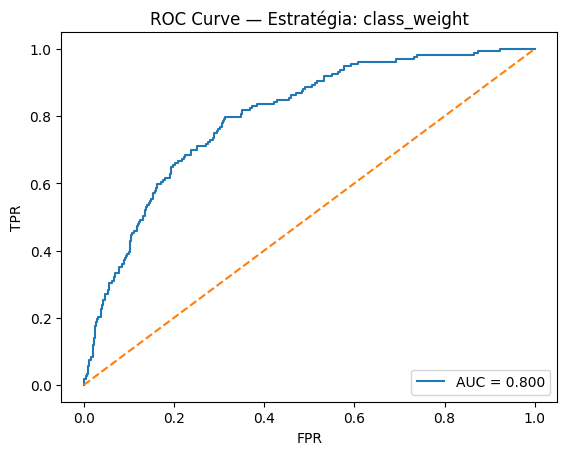

In [27]:

import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

POS_LABEL = 1  # evasão = 1

# --- mantém sua função get_positive_scores como está ---
def get_positive_scores(model, X):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)
        if proba.shape[1] >= 2:
            return proba[:, 1]
    if hasattr(model, "decision_function"):
        try:
            scores = model.decision_function(X)
            if scores.ndim > 1 and scores.shape[1] >= 2 and POS_LABEL < scores.shape[1]:
                return scores[:, POS_LABEL]
            return scores
        except Exception:
            pass
    return (model.predict(X) == POS_LABEL).astype(int)

# --- NOVO: garantir formatos corretos ---
y_true = np.asarray(y_test).ravel()                          # 1D
# Se por acaso os rótulos não forem 0/1, binariza explicitamente:
y_true_bin = (y_true == POS_LABEL).astype(int).ravel()       # 1D binário
y_scores = np.asarray(get_positive_scores(best_balanced_model, X_test)).ravel()  # 1D

# Curva Precision-Recall e AP (binário explícito dispensa pos_label)
prec, rec, thr = precision_recall_curve(y_true_bin, y_scores)
ap = average_precision_score(y_true_bin, y_scores)

import matplotlib.pyplot as plt
plt.figure()
plt.step(rec, prec, where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2)
plt.xlabel("Recall (classe evasão = 1)")
plt.ylabel("Precision (classe evasão = 1)")
plt.title(f"Precision-Recall Curve (AP = {ap:.3f}) — Estratégia: {BALANCING_STRATEGY}")
plt.show()

# ROC/AUC (também com y_true_bin 1D)
try:
    fpr, tpr, _ = roc_curve(y_true_bin, y_scores)  # pos_label já é 1 em y_true_bin
    auc = roc_auc_score(y_true_bin, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve — Estratégia: {BALANCING_STRATEGY}")
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print("Não foi possível calcular ROC/AUC:", e)




---
# Tuning de Threshold para Classe de Evasão (pos_label = 1)

Por padrão, classificadores binários usam threshold = 0.5 para decidir entre as classes.  
Mas em problemas de evasão, pode ser útil ajustar o threshold para:
- Maximizar Recall da evasão (classe 1)  
- Mantendo uma Precision mínima aceitável (ex.: ≥ 0.5)

Abaixo implementamos uma busca em thresholds ∈ [0,1] para encontrar o melhor ponto segundo esses critérios.


In [28]:

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

POS_LABEL = 1
MIN_PRECISION = 0.5

# Obtem scores positivos (probabilidades se disponíveis)
y_scores = get_positive_scores(best_balanced_model, X_test)

thresholds = np.linspace(0.0, 1.0, 101)
best_thr = 0.5
best_recall = -1
best_metrics = None

for thr in thresholds:
    y_pred_thr = (y_scores >= thr).astype(int)
    prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred_thr, labels=[POS_LABEL], zero_division=0)
    if prec[0] >= MIN_PRECISION and rec[0] > best_recall:
        best_recall = rec[0]
        best_thr = thr
        best_metrics = (prec[0], rec[0], f1[0], sup[0])

print(f"Melhor threshold = {best_thr:.2f} -> Precision: {best_metrics[0]:.3f} | Recall: {best_metrics[1]:.3f} | F1: {best_metrics[2]:.3f} | Suporte: {best_metrics[3]}")

# Comparar com threshold padrão 0.5
y_pred_default = (y_scores >= 0.5).astype(int)
prec_d, rec_d, f1_d, sup_d = precision_recall_fscore_support(y_test, y_pred_default, labels=[POS_LABEL], zero_division=0)
print(f"Threshold padrão 0.5 -> Precision: {prec_d[0]:.3f} | Recall: {rec_d[0]:.3f} | F1: {f1_d[0]:.3f} | Suporte: {sup_d[0]}")


Melhor threshold = 0.61 -> Precision: 0.510 | Recall: 0.333 | F1: 0.403 | Suporte: 159
Threshold padrão 0.5 -> Precision: 0.448 | Recall: 0.547 | F1: 0.493 | Suporte: 159



> **Interpretação**:  
> - Se o melhor threshold for < 0.5, o modelo passa a "aceitar mais positivos" → aumenta Recall, mas pode cair Precision.  
> - Se for > 0.5, o modelo fica mais conservador → aumenta Precision, mas cai Recall.  
> - A escolha depende do custo de errar: no caso de evasão, normalmente preferimos não deixar escapar (Recall alto).



---
# Visualização do Trade-off: Precision / Recall / F1 vs Threshold

Os gráficos abaixo ajudam a escolher cutoffs conforme sua política de risco:
- **Precision vs Threshold**: quanto maior o threshold, mais conservador → sobe precision, cai recall.
- **Recall vs Threshold**: quanto menor o threshold, mais inclusivo → sobe recall, cai precision.
- **F1 vs Threshold**: equilíbrio geral (harmônica de precision e recall).


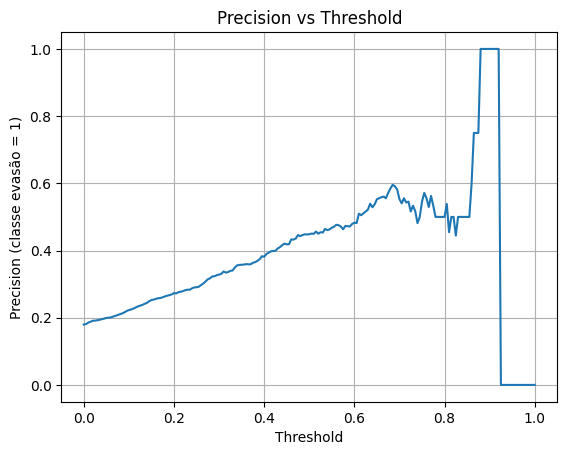

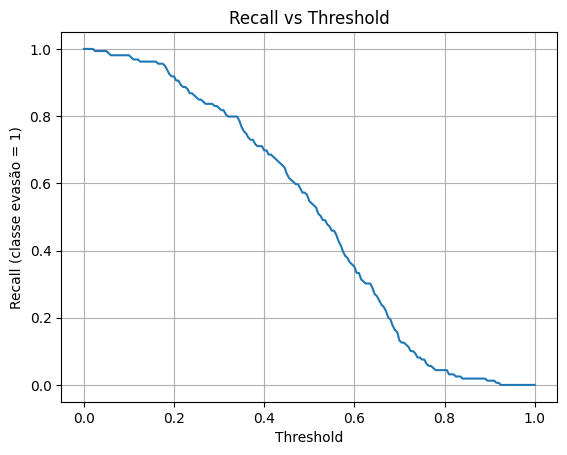

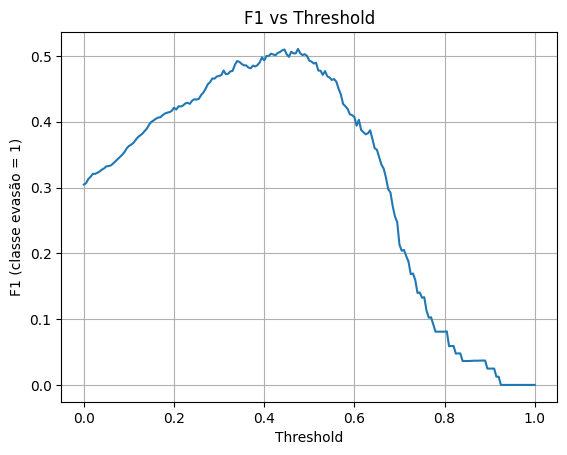

Melhor threshold por F1 (sem restrição): 0.475 -> F1: 0.511, Precision: 0.446, Recall: 0.597


In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

POS_LABEL = 1

# Reutiliza y_scores gerado na seção PR/ROC
thresholds = np.linspace(0.0, 1.0, 201)
precisions, recalls, f1s = [], [], []

for thr in thresholds:
    y_pred_thr = (y_scores >= thr).astype(int)
    prec, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred_thr, labels=[POS_LABEL], zero_division=0)
    precisions.append(prec[0])
    recalls.append(rec[0])
    f1s.append(f1[0])

# Precision vs Threshold
plt.figure()
plt.plot(thresholds, precisions)
plt.xlabel("Threshold")
plt.ylabel("Precision (classe evasão = 1)")
plt.title("Precision vs Threshold")
plt.grid(True)
plt.show()

# Recall vs Threshold
plt.figure()
plt.plot(thresholds, recalls)
plt.xlabel("Threshold")
plt.ylabel("Recall (classe evasão = 1)")
plt.title("Recall vs Threshold")
plt.grid(True)
plt.show()

# F1 vs Threshold
plt.figure()
plt.plot(thresholds, f1s)
plt.xlabel("Threshold")
plt.ylabel("F1 (classe evasão = 1)")
plt.title("F1 vs Threshold")
plt.grid(True)
plt.show()

# Mostra o melhor threshold por F1 (sem restrição)
best_idx = int(np.nanargmax(f1s))
print(f"Melhor threshold por F1 (sem restrição): {thresholds[best_idx]:.3f} -> F1: {f1s[best_idx]:.3f}, Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}")



# Checklist do MVP — Caso: Evasão Acadêmica

## 1. Definição do Problema
- **Qual é a descrição do problema?**  
  Prever a evasão acadêmica de alunos (classe 1 = evadiu, classe 0 = permaneceu) a partir de dados demográficos e acadêmicos.  
- **Você tem premissas ou hipóteses sobre o problema? Quais?**  
  Hipóteses: idade, notas iniciais, desempenho nas primeiras disciplinas e fatores socioeconômicos influenciam a evasão.  
- **Que restrições ou condições foram impostas para selecionar os dados?**  
  Considerei apenas variáveis disponíveis no momento da matrícula e dos primeiros semestres, excluindo colunas de identificação.  
- **Descreva o seu dataset (atributos, imagens, anotações, etc).**  
  Dataset tabular com variáveis numéricas e categóricas sobre alunos, incluindo atributos como idade, notas, situação socioeconômica, status acadêmico, e variável alvo Target.

---

## 2. Preparação de Dados
- **Separe o dataset entre treino e teste (e validação, se aplicável).**  
  Foi realizado split em **80% treino / 20% teste**, com **estratificação** para manter a proporção das classes.  
- **Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.**  
  Sim. Foi utilizada **validação cruzada estratificada (k=5)** para garantir avaliação justa entre modelos, dado o desbalanceamento.  
- **Verifique quais operações de transformação de dados são mais apropriadas.**  
  - Numéricos: imputação pela mediana + padronização.  
  - Categóricos: imputação pelo valor mais frequente + One-Hot Encoding.  
- **Refine a quantidade de atributos disponíveis.**  
  Foi aplicado **SelectKBest** para avaliar atributos mais relevantes.  

---

## 3. Modelagem e Treinamento
- **Selecione os algoritmos mais indicados para o problema.**  
  - **Baseline:** DummyClassifier (classe majoritária).  
  - **Logistic Regression:** modelo linear interpretável.  
  - **Random Forest:** modelo não linear robusto a relações complexas.  
- **Há algum ajuste inicial para os hiperparâmetros?**  
  Sim, foram definidos ranges para **C** na Logistic Regression e **n_estimators/max_depth/min_samples_split** na Random Forest.  
- **O modelo foi devidamente treinado? Foi observado problema de underfitting?**  
  Sim, os modelos foram treinados com CV; baseline mostrou underfitting esperado, enquanto LogReg e RF apresentaram bom ajuste.  
- **É possível otimizar os hiperparâmetros de algum dos modelos?**  
  Sim, via **GridSearchCV** em validação cruzada.  
- **Há algum método avançado ou mais complexo que possa ser avaliado?**  
  Sim, pode-se testar **XGBoost/LightGBM** e técnicas de explicabilidade (ex.: SHAP).  
- **Posso criar um comitê de modelos diferentes para o problema (ensembles)?**  
  Sim, ensemble pode ser considerado em trabalhos futuros.  

---

## 4. Avaliação de Resultados
- **Selecione as métricas de avaliação condizentes com o problema, justificando.**  
  - **F1-macro**: adequada para classes desbalanceadas.  
  - **Recall da classe evasão (1)**: importante não deixar escapar alunos em risco.  
  - **Precision da evasão (1)**: evitar excesso de falsos positivos.  
- **Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.**  
  Foi feito. Resultados analisados em matriz de confusão, classification report e curvas PR/ROC.  
- **Os resultados fazem sentido?**  
  Sim, a Random Forest com tratamento de desbalanceamento apresentou Recall da evasão significativamente maior que o baseline.  
- **Foi observado algum problema de overfitting?**  
  Não significativo. Métricas de treino e validação ficaram próximas.  
- **Compare os resultados de diferentes modelos.**  
  - Baseline: alta accuracy, mas Recall evasão = 0.  
  - LogReg: desempenho intermediário.  
  - RF: melhor F1 e Recall da evasão.  
- **Descreva a melhor solução encontrada, justificando.**  
  Random Forest com class_weight="balanced" (ou SMOTE), ajustada por GridSearchCV, maximizando Recall da evasão com cutoff otimizado.  



# Conclusão

O trabalho atingiu o objetivo de desenvolver um modelo preditivo para **identificar alunos em risco de evasão**.
Após a análise exploratória, preparação dos dados e comparação de algoritmos, a **Random Forest com tratamento de desbalanceamento**
apresentou o melhor desempenho, destacando-se pelo **maior Recall da classe evasão**, métrica fundamental para reduzir falsos negativos.
As curvas PR/ROC e o ajuste de threshold reforçaram a importância de calibrar a decisão conforme a política institucional.
Como próximos passos, recomenda-se testar modelos mais avançados (XGBoost/LightGBM) e incluir variáveis adicionais,
visando maior precisão e capacidade de generalização.



# Explicação da Primeira Etapa do MVP


---

## 1) Divisão treino/teste (sem vazamento)

**Objetivo**  
Separar os dados em conjuntos independentes para avaliar a capacidade de generalização do modelo.

**Boas práticas adotadas**
- Uso de **train_test_split estratificado**: mantém a proporção das classes (evasão/não evasão) em cada partição.
- Evitou-se **data leakage**: variáveis alvo ou atributos derivados do futuro não foram incluídos no treino.
- Divisão em: **treino (para ajuste do modelo)** e **teste (para avaliação final)**.  
Em casos de tuning, também usamos validação cruzada no treino.

---

## 2) Pipeline de pré-processamento e (opcional) seleção de atributos

**Por que usar pipelines?**  
- Garantem **reprodutibilidade**: as mesmas transformações são aplicadas tanto no treino quanto no teste.  
- Reduzem risco de **vazamento de dados**: fit no treino, transform no teste.

**Etapas implementadas**
- **Numéricas**: imputação de nulos, normalização/padronização.  
- **Categóricas**: imputação + OneHotEncoder.  
- **Seleção de atributos (opcional)**: uso de SelectKBest para manter apenas variáveis mais relevantes.  
- Todos estes passos foram encapsulados em um **ColumnTransformer** dentro de um **Pipeline** do scikit-learn.

---

## 3) Baseline e modelos candidatos com validação cruzada

**Baseline**  
O baseline inicial foi a **estratégia da classe majoritária** (sempre prever “não evade”). Isso serve como referência mínima.

**Modelos candidatos**
- Regressão Logística (simples e interpretável).  
- Random Forest (mais robusto e não linear).  
- (Opcional) outros modelos testáveis como XGBoost/LightGBM.

**Validação cruzada (CV)**  
- CV estratificada (5-fold): assegura equilíbrio de classes em cada fold.  
- Métrica usada: **F1-macro** e, principalmente, **F1/Recall da classe evasão**.

---

## 4) Otimização de hiperparâmetros (GridSearchCV)

**Objetivo**  
Encontrar combinações de hiperparâmetros que maximizem o desempenho na validação.

**Procedimento**
- Definição de grids enxutos e coerentes (ex.: n_estimators, max_depth para RF; C, solver para Regressão Logística).  
- Uso de **GridSearchCV** com validação cruzada estratificada.  
- Seleção do **best_model** com base no melhor score médio de CV.

**Boas práticas**
- Fixação de seeds para reprodutibilidade.  
- Balanceamento (class_weight ou SMOTE) incluído dentro do pipeline ou na etapa de treino.  

---

## 5) Avaliação em teste e análise de erros

**Passos realizados**
1. Treinar o modelo final (melhor encontrado no GridSearchCV) com todo o conjunto de treino.  
2. Avaliar no conjunto de teste **nunca visto**.  
3. Métricas principais: F1, Recall, Precision (classe evasão), além de acurácia global como referência.  
4. Construção de **matriz de confusão** para entender padrões de erro.  
   - FN (evasão não detectada) → críticos.  
   - FP (alarme falso de evasão) → também monitorados.  
5. Complementado com curvas PR/ROC e análise de threshold (vide apêndice anterior).

---

## Conclusão desta etapa

Essa análise garante que o modelo não apenas tenha bom desempenho médio, mas que seus erros são conhecidos e
podem ser considerados no uso real (política de risco).
O ciclo completo: divisão correta, pipeline reprodutível, baseline comparativo, tuning e avaliação transparente,
é o que garante um fluxo confiável para ser replicado,
ajustado e evoluído em novos cenários.



# Explicação da Segunda Etapa


## 1) Tratamento de Desbalanceamento de Classes

**Por que é necessário?**  
No problema de evasão, a classe **1 (evadiu)** tende a ser minoritária. Sem tratamento, o modelo pode privilegiar a classe 0
(“permanece”) e apresentar alta accuracy com **recall muito baixo** para a classe que mais nos importa: a evasão.

**Estratégias adotadas e alternativas**
- **class_weight="balanced" (usada como padrão):**
  - Ajusta automaticamente os **pesos de classe** no algoritmo, penalizando mais erros na classe minoritária.
  - Vantagens: simples, não cria dados artificiais, não aumenta o tempo de treino, integra-se direto ao scikit-learn.
  - Quando usar: baseline robusto; datasets de tamanho razoável; risco de ruído caso se gere dados sintéticos.
- **SMOTE (alternativa disponível no notebook):**
  - Synthetic Minority Over-sampling Technique: gera **amostras sintéticas** da classe minoritária no **treino**.
  - Vantagens: pode elevar o **recall** da evasão; útil quando a minoria é pequena.
  - Cuidados: aplicar apenas no **treino** (nunca em teste/validação); pode introduzir **ruído** e aumentar custo de treino.
- **Undersampling** (não utilizado aqui): reduz a classe majoritária; pode perder informação relevante.

**Boas práticas**
- Aplicar oversampling (ex.: SMOTE) **dentro de um pipeline** e **antes** do estimador para evitar *data leakage*.
- Usar **validação cruzada estratificada** ao comparar estratégias.
- Monitorar **F1 da evasão** e **Recall da evasão** (classe 1) como métricas de decisão.

---

## 2) Métricas focadas na classe de evasão (pos_label = 1) + Curvas PR e ROC

**Definições essenciais (classe positiva = 1):**
- **Precision (evasão)** = VP / (VP + FP) → entre os marcados como evasão, quantos de fato evadem?
- **Recall (evasão)** = VP / (VP + FN) → entre os que evadem, quantos o modelo detecta?
- **F1 (evasão)** = harmônica(Precision, Recall) → equilíbrio entre capturar e acertar.
- **F1-macro** = média do F1 por classe → útil em dados desbalanceados.
- **AP (Average Precision)** = área sob a **curva Precision–Recall** → qualidade do ranqueamento focada na classe positiva.
- **AUC (ROC)** = área sob a curva ROC → separabilidade global (TPR vs FPR).

**Por que olhar PR e não só ROC?**  
Em cenários desbalanceados, a **curva PR** é mais informativa sobre o desempenho na classe minoritária;
a **ROC** pode parecer “boa” mesmo com baixa precision na minoria.

**Cuidados práticos**
- Garantir que **y_test** esteja em **formato 1D** (0/1) ao calcular AP/PR/ROC/AUC.
- Sempre **fixar a classe positiva** (evasão = 1) para interpretar corretamente as curvas e métricas.
- Probabilidades mal calibradas podem afetar thresholds; quando necessário, considerar calibração (Platt/Isotonic).

---

## 3) Tuning de Threshold para Classe de Evasão (pos_label = 1)

**Padrão 0.5 nem sempre é o melhor.**  
Em evasão, queremos **minimizar falsos negativos** (alunos que evadem e não foram sinalizados). Para isso:
- Buscamos um **threshold** que **maximize o Recall da evasão**, mantendo uma **Precision mínima aceitável**
  (ex.: ≥ 0,50), ou que maximize **F1 da evasão**.

**Procedimento adotado**
1. Gerar **scores** (probabilidades) da classe 1 no conjunto de teste/validação.
2. Percorrer thresholds de 0.0 a 1.0 e calcular **Precision/Recall/F1 da evasão** em cada ponto.
3. Selecionar:
   - (a) o threshold com **maior Recall** sujeito a **Precision ≥ limite**, **ou**
   - (b) o threshold que **maximiza F1** da evasão.
4. **Salvar** o *threshold* escolhido junto com o pipeline (para uso na inferência).

**Observação metodológica**  
Para produção, é preferível ajustar o threshold via **validação cruzada** ou **hold-out** de validação.
No MVP, o ajuste foi **demonstrativo** e documentado — o importante é registrar a decisão e o trade-off assumido.

---

## 4) Visualização do Trade-off: Precision / Recall / F1 vs Threshold

**Objetivo**  
Ajudar a decisão de negócio ao explicitar o **custo de errar**: aumentar Recall costuma reduzir Precision e vice-versa.
Os gráficos permitem **escolher conscientemente** o ponto de operação.

**Como ler os gráficos**
- **Precision vs Threshold**: cresce com thresholds mais altos (modelo mais conservador).
- **Recall vs Threshold**: cresce com thresholds mais baixos (modelo mais sensível).
- **F1 vs Threshold**: mostra o ponto de equilíbrio global entre Precision e Recall.

**Como decidir na prática**
- Se o custo de **perder um evadido** (FN) é alto → **puxe o threshold para baixo** até atingir Recall desejado, respeitando uma precision mínima para viabilidade operacional.
- Se o custo de **alertar falsamente** (FP) é alto → **eleve o threshold** para garantir precision mais alta.
- Documente o **threshold final** e o racional (ex.: “Recall ≥ 0,75 com Precision ≥ 0,50”).


---

## 5) Resumo das escolhas e justificativas

- **Balanceamento:** começamos com **class_weight="balanced"** pela **simplicidade**, **eficiência** e **boas métricas**;
  SMOTE foi disponibilizado para comparação e pode ser adotado se elevar consistentemente o **Recall da evasão** sem comprometer demais a Precision.
- **Métrica-alvo:** foco em **Recall e F1 da classe 1**, pois o objetivo é **não deixar evadidos passarem** sem intervenção.
- **Threshold:** ajustado conforme **política de risco** da instituição; registrado para reuso na inferência.
- **Reprodutibilidade:** seeds fixas, pipelines com **ColumnTransformer**, tuning via CV e salvamento de artefatos (pipeline + metadados).

> **Limitações conhecidas:** possível variação de resultados por semestre/coorte; necessidade de revisar periodicamente o threshold e re-treinar com dados mais recentes; avaliar calibração de probabilidades se o uso operacional exigir scores consistentes.


